In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

## 1. Explorative Analyse des Datensatzes ''Boston Housing''

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
        'LSTAT', 'TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols,
                     index_col=False)

### Führen Sie für diesen Datensatz eine explorative Analyse wie in der Vorlesung gezeigt mithilfe eines IPython-Notebooks und den Paketen Pandas und Numpy durch.

#### Allgemeine Beschaffenheit der Daten

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.shape

(506, 14)

506 Beobachtungen mit 14 Attributen

In [5]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
TGT        float64
dtype: object

In [6]:
boston.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TGT        False
dtype: bool

Keine Nulls $\rightarrow$ **vollständiger Datensatz**

In [7]:
boston.duplicated().any()

False

Keine duplizierten Beobachtungen

#### Descriptive Statistiken

In [8]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


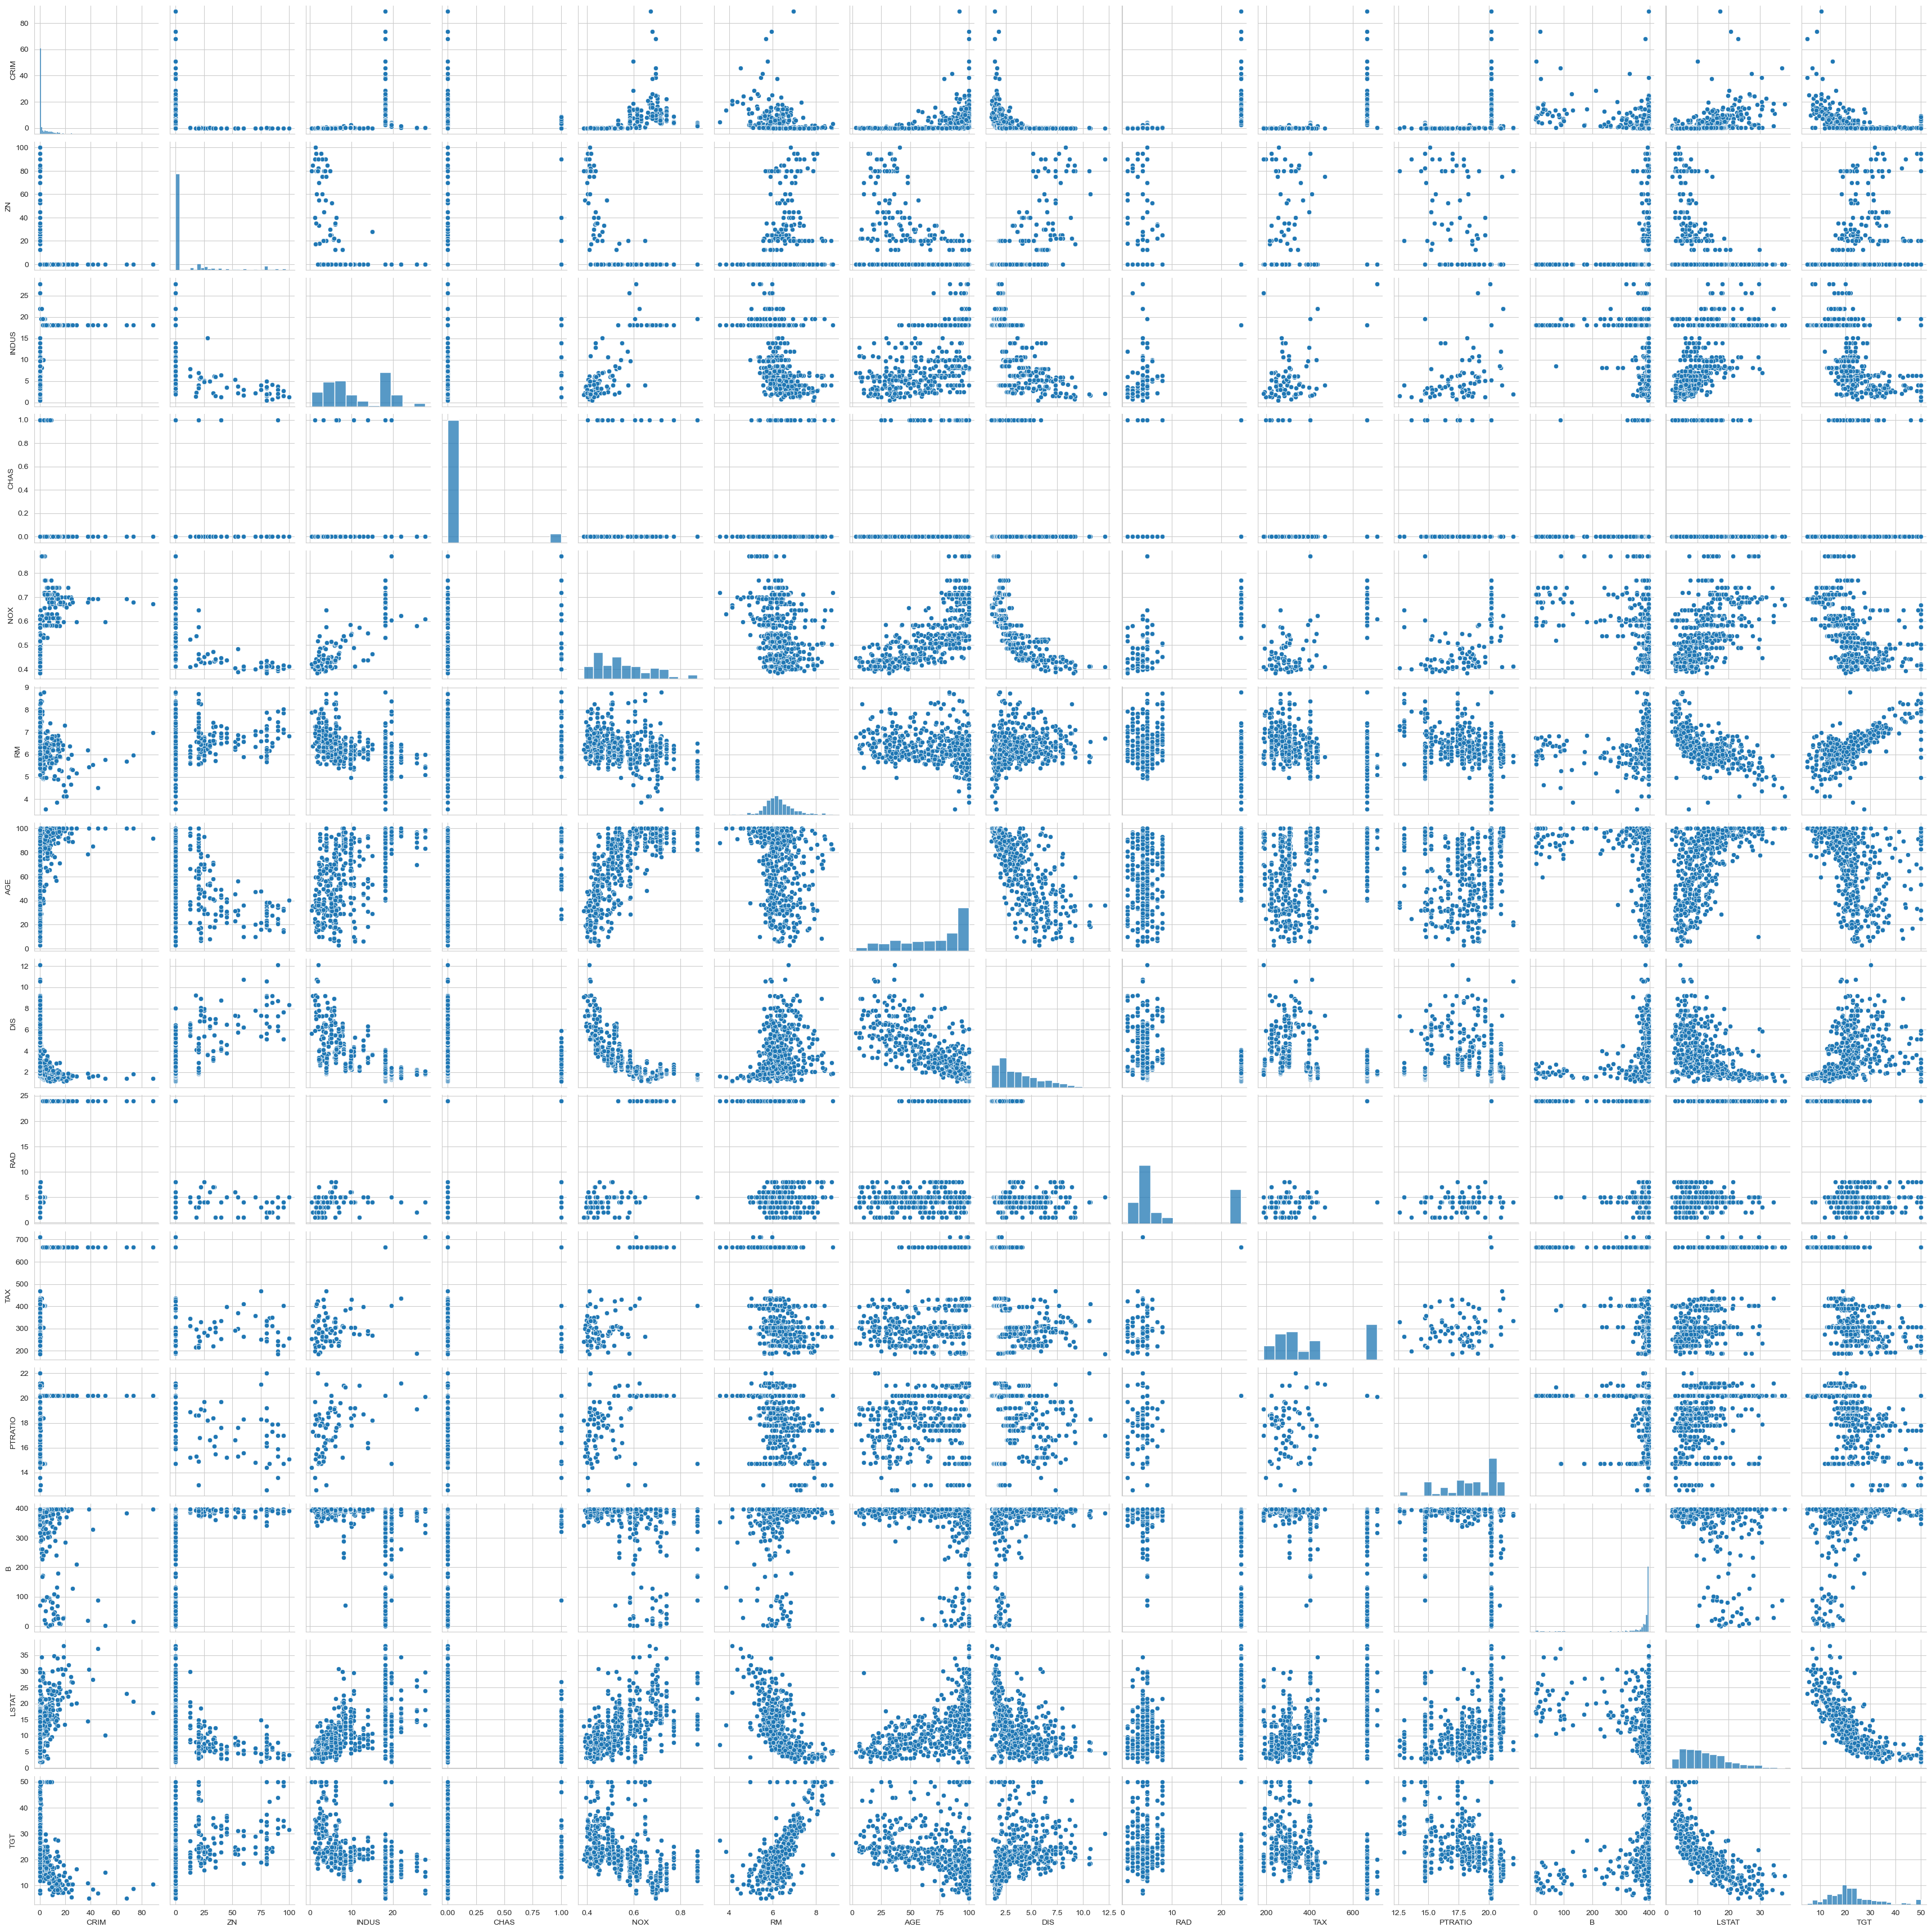

In [9]:
sns.pairplot(boston)

plt.show()

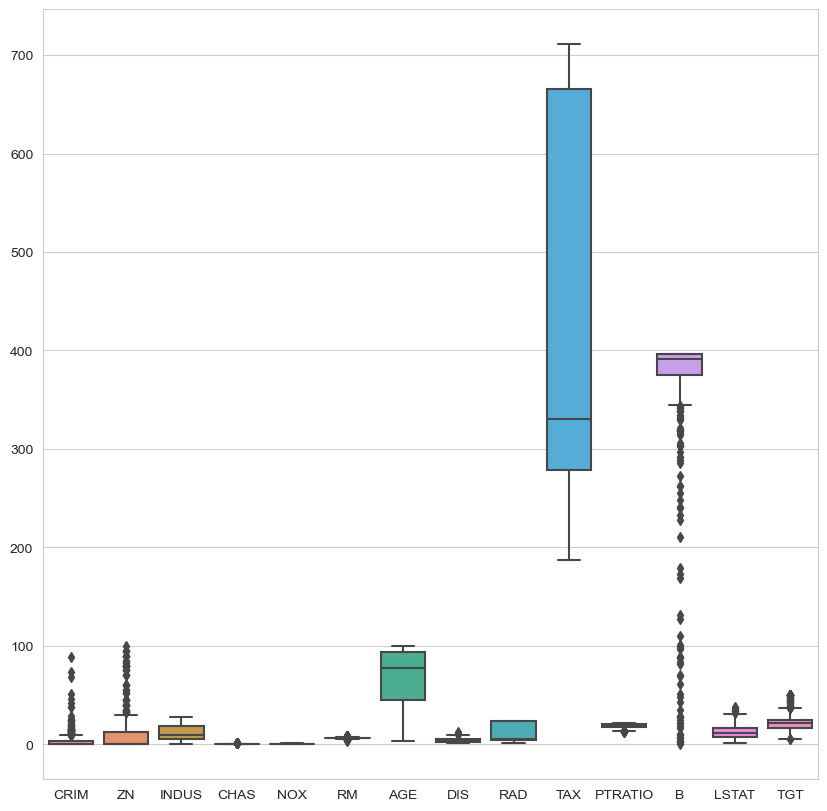

In [10]:
# Create own figure with custom size
fig = plt.figure(figsize=(10, 10))

sns.boxplot(data=boston)

plt.show()

### Beantworten Sie anhand der Darstellung der Streumatrix folgende Fragen: Welche der Variablen sind kategorisch? Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum? Welche dieser Variablen sind miteinander korreliert? Welche sind daher Kandidaten, die man evtl. weglassen könnte? (Beantwortung bitte als Markup in Notebook eintragen)


#### Kategorische Variablen

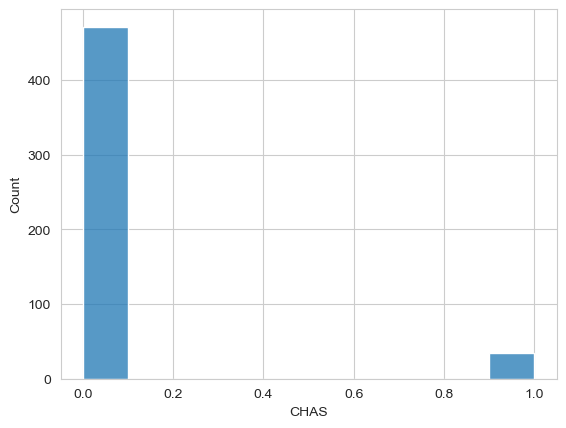

In [16]:
sns.histplot(boston.CHAS);

Außer CHAS scheinen keine kategorischen Variablen zu existieren

#### Korrelation mit der Response 

In [54]:
# ~ Operator logische Negation
~boston.corrwith(boston.TGT).between(-0.5, 0.5)

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM          True
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO     True
B          False
LSTAT       True
TGT         True
dtype: bool

In [6]:
boston.corrwith(boston.TGT).abs().sort_values()


CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
TGT        1.000000
dtype: float64

In [ ]:
boston.corrwith(boston.TGT).abs().sort_values()


Die Variablen CHAS, DIS, B sind nur schwach mit der Response korreliert, können dementsprechend weggelassen werden

Die Features RM, PTRATIO, LSTAT scheinen besonders stark mit der Response korreliert zu sein, da der Betrag der Korrelation 
der Features über 0.5 liegt

#### Zusätzliche Korrelationsheatmap

<AxesSubplot:>

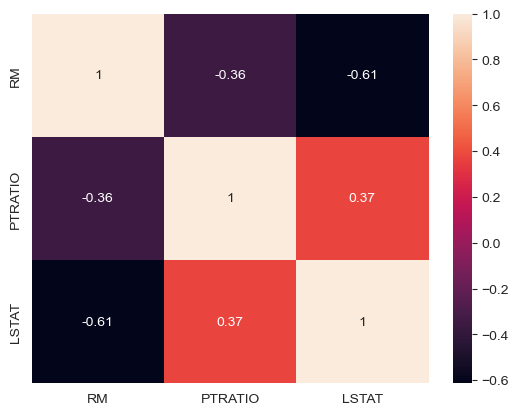

In [6]:
# Create own figure with custom size
#fig = plt.figure(figsize=(3,3))

sns.heatmap(
    boston.loc[:, ["RM", "PTRATIO", "LSTAT"]].corr(),
    annot=True
)

Zwischen Lstat und RM existiert eine relativ starke Korrelation mit -.61, dementsprechend ist noch mit Redundanz zu rechnen

## Package Metadata

In [25]:
% load_ext version_information

In [27]:
% version_information numpy, pandas, matplotlib, seaborn

Software versions
Python 3.10.4 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.4.0
OS Windows 10 10.0.19044 SP0
numpy 1.22.3
pandas 1.4.3
matplotlib 3.5.2
seaborn 0.11.2
Mon Oct 10 16:21:11 2022 Mitteleuropäische Sommerzeit